# Final Project For ECON 570 - Yifan Fu
## What is the Impact of Education on a person's Wage?

## Introduction


Education performs an imperative position in contemporary-day hard work markets. Hundreds of research in many
distinctive international locations and time durations have showed that better-knowledgeable people earn
better wages.

Dickson[1] takes a look at estimates the go back to schooling in Britain the use of instrumental variable (IV) estimators: one exploits version in training related to early smoking, the alternative makes use of the elevating of the college leaving age; each have an effect on a giant share of the sample. Early smoking is discovered to be a sturdy and legitimate IV.

Dustmann et. al[2] use micro records for England and Wales to take a look at the results of sophistication length at the selection to live on in complete time education at sixteen and on wages later in life. They locate that magnificence length has a enormous and widespread impact at the selection to live on.

Kampelmann et. al[3] estimate the effect of training on productiveness, salary fees and productiveness-salary gaps (i.e. profits) the use of Belgian connected panel data. Findings spotlight that academic credentials have a more potent effect on productiveness than on salary fees.

So, within this notebook, we mainly want to explore the causal relationship between years of education and salary. We will also consider using age as a covariate, because empirically, the older a person is, the more work experience they have,and the higher the salary.


## Data

The data - 1980 census extract, is from Angrist Data Archive(https://economics.mit.edu/faculty/angrist/data1/data/angkru95).
It is a CPS extract which contains 30,967 observations on men born 1944-53 from the 1979 and 1981-85 March CPS, matched to lottery number dummies for groups of 25 lottery numbers. There are 72 variables in original data, for convenience, we only use these variables:
1. annwage: annual wage
2. age:
3. edu: the highest education grade

First, let's take a look at the data

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

pd.set_option('display.max_rows', 20)

In [97]:
df = pd.read_stata('./extract.dta')
df = df[['annwage', 'educ', 'age']]

Show comprehensive summary statistics.

In [98]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
annwage,30617.0,17575.975275,13477.972292,0.0,8000.0,16500.0,25000.0,99999.0
educ,30967.0,13.162883,3.281072,0.0,12.0,13.0,16.0,18.0
age,30617.0,33.111866,3.342376,25.0,31.0,33.0,36.0,41.0


We can see that the maximum annwage is 99999. Experience tells us that this value is not normal. We have reason to believe that this value is because the creator of the dataset set all values greater than or equal to 99999 to 99999. For further verification, We can look at the distribution of annwage.

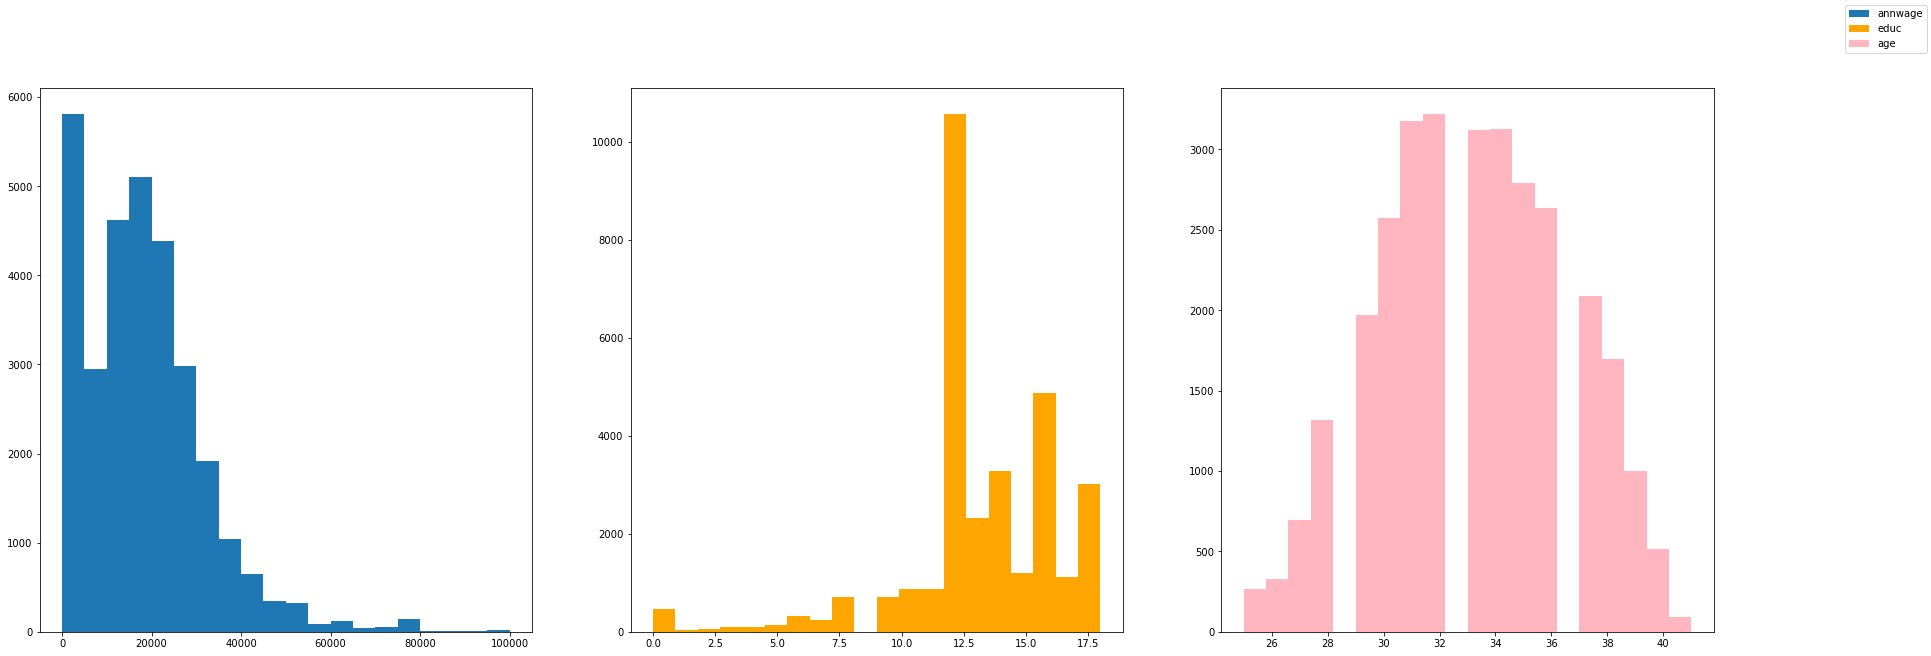

In [99]:
fig, axs = plt.subplots(1, 3, figsize=(30, 10))

axs[0].hist(df['annwage'], bins=20, label='annwage')
axs[1].hist(df['educ'], bins=20, color='orange', label='educ')
axs[2].hist(df['age'], bins=20, color='lightpink', label='age')
fig.legend()
plt.show()

From the distribution plot we can see that the frequency of 99999 is a little unusually high, so we regard data with wage of 99999 as outliers and decide to remove them from the dataset. And the other two values have no anomalies and we do nothing.

In [89]:
df = df[df['annwage'] < 99999]

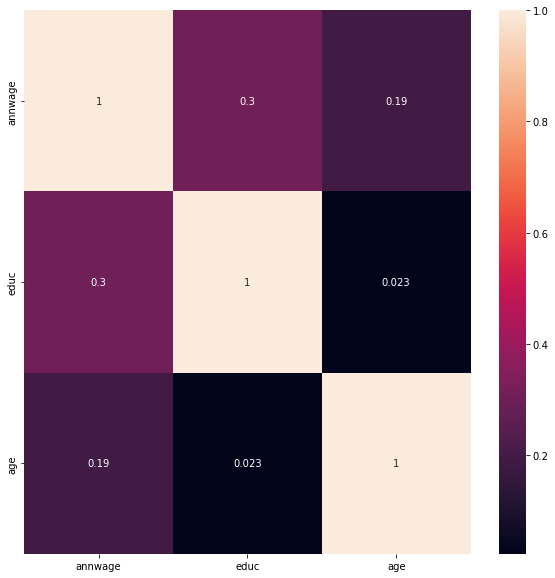

In [105]:
plt.figure(figsize=(10, 10))
corrs = df.corr()
sns.heatmap(corrs, annot=True)
plt.show()

## Fit Data using OLS Model
### Do Simple OLS without covariates
(1) $ Annwage = \beta_0 + \beta_1 Educ + \epsilon $  

In [106]:
result = smf.ols(formula= 'annwage ~ educ', data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                annwage   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     3114.
Date:                Fri, 06 May 2022   Prob (F-statistic):               0.00
Time:                        13:42:16   Log-Likelihood:            -3.3309e+05
No. Observations:               30617   AIC:                         6.662e+05
Df Residuals:                   30615   BIC:                         6.662e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -715.3582    335.891     -2.130      0.0

From the summary of the ols fitted model, we have F-statistic > 10, and we have p-value < 0.05, So there are effects of education on wage.

### Do Simple OLS with covariates
(2) $ Annwage = \beta_0 + \beta_1 Educ + \gamma Age + \epsilon $  

In [108]:
result = smf.ols(formula= 'annwage ~ educ + age', data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                annwage   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     2214.
Date:                Fri, 06 May 2022   Prob (F-statistic):               0.00
Time:                        13:43:17   Log-Likelihood:            -3.3251e+05
No. Observations:               30617   AIC:                         6.650e+05
Df Residuals:                   30614   BIC:                         6.650e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.511e+04    779.139    -32.223      0.0

From the summary of the second ols fitted model, we have F-statistic > 10, and we have p-values < 0.05 and a larger R-square score, So we can determine that there are effects of education on wage. And the age is also a effect factor.

## Conclusion
From the model results above, we can see that the effect of education on wages does exist. When we only considered education in the model, the fitting effect of the model was not so good, and when we included age as a covariate, the effect of the model was better, which shows that age is also an important factor affecting wages.

In the future we may consider including more covariates such as `pob` into the model, or using IV variables.

## Reference

[1] Dickson, M. (2013). The causal effect of education on wages revisited. Oxford Bulletin of Economics and Statistics, 75(4), 477-498.

[2] Dustmann, Christian, Najma Rajah, and Arthur Van Soest. "Class size, education, and wages." The Economic Journal 113.485 (2003): F99-F120.

[3] Kampelmann, S., Rycx, F., Saks, Y., & Tojerow, I. (2018). Does education raise productivity and wages equally? The moderating role of age and gender. IZA Journal of Labor Economics, 7(1), 1-37.